## SKlearn Logistic Regression (MNIST)

In [10]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Downloading the Data (MNIST)

In [9]:
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

### Splitting Data into Training and Test Sets (MNIST)

In [20]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### Array data shape

In [27]:
print (train_img.shape)
print (test_img.shape)
print (train_lbl.shape)
print (test_lbl.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### DIsplay Data

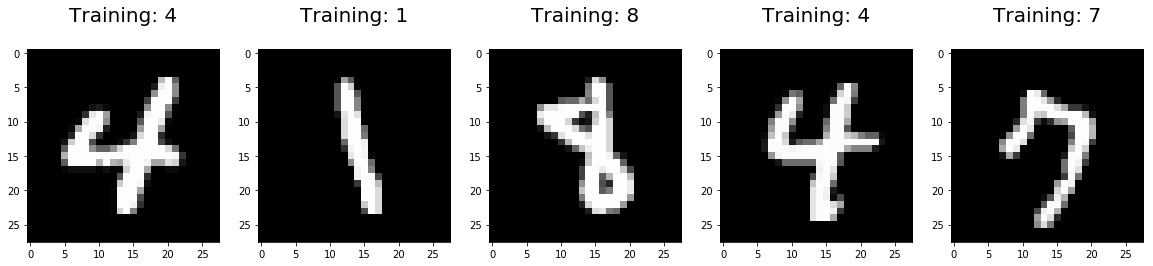

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

In [13]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

### Predict the test_img label
Predict the labels of new data (new images)

Uses the information the model learned during the model training process


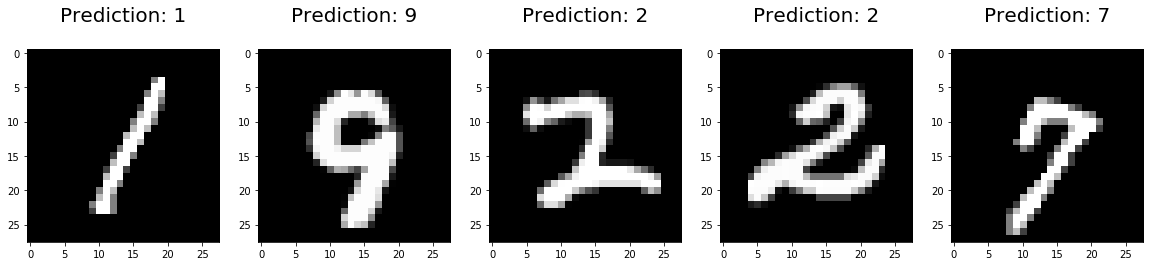

In [15]:
predictions = logisticRegr.predict(test_img)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(test_img[0:5], predictions[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Prediction: %i\n' % label, fontsize = 20)

### Display Misclassified images with Predicted Labels (MNIST)

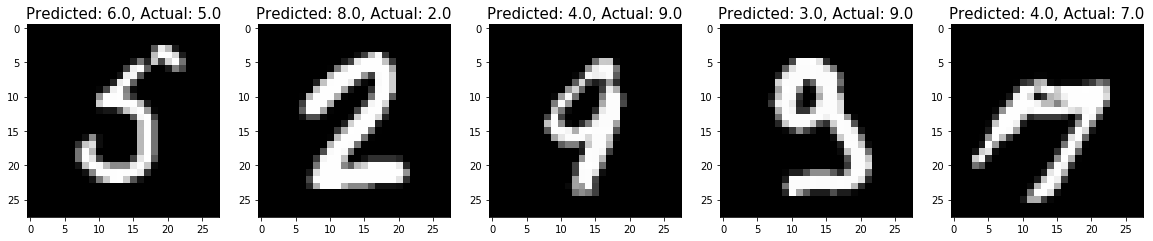

In [17]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)


### Measuring Model Performance (MNIST)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points


In [18]:
accuracy = accuracy_score(test_lbl, predictions)
print ('Accuracy:', accuracy)

Accuracy: 0.9131
